In [1]:
import os

In [2]:
os.getcwd()

'/Users/hemant/DataScience/Python/Week_3/SelfBasedLearn'

In [3]:
os.chdir('/Users/hemant/DataScience/Python/Week_3/SelfBasedLearn/')

### Visualization = making graphs 

There are 3 main Graph making libraries, While installing Anaconda distribution we get Matplotlib & Seaborn defeult.

    1.Matplotlib
        i. Pyplot is one of the imp sub lib within Matplotlib
        ii.We can go through sample on https://matplotlib.org/gallery/index.html
        iii.this is good for basic graphs.
        
    2.Seaborn
        i.Seaborn takes the Matplotlib graphs and make it way more better for visualization
        ii.We can go through sample on https://seaborn.pydata.org/examples/index.html
   
    3.Plotly
        i. Plotly is made by the commercial company but it has a free version
        ii. Main goal of Plotly is to make graph interactive.
        iii.We can go through sample on https://dash-gallery.plotly.host
        

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #seaborn is based on matplotlib
sns.set(color_codes=True) # adds nice background to the graphs
%matplotlib inline 
# tells python to display the graphs

In [5]:
auto = pd.read_csv('Automobile.csv')

In [6]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Plotting univariate distributions:

The most convienient  way to take a quick look at a univariate distribution in seaborn is the displot() function
By default this will draw a histogram and fit a kernal density estimate(KDE).
 

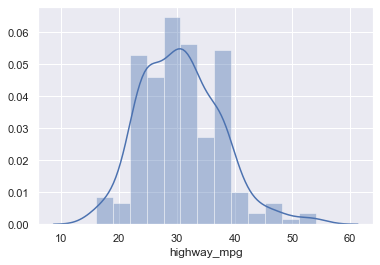

In [7]:
sns.distplot(auto['highway_mpg']);

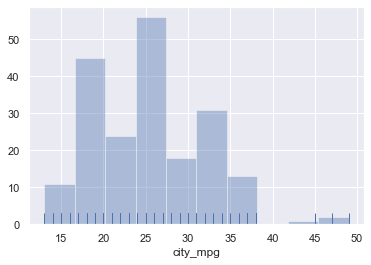

In [8]:
# We can turn the KDE off and put a tickmark along the X-axis for every data point with Rug

sns.distplot(auto['city_mpg'], kde=False, rug=True);

Above were best for 1 dimentional graph, Lets learn how to make 2D Graphs

### Plotting bivariate distribution :
It can also be useful to visualize the relationship between variables.The easiest way to do this in seaborn is to use joinplot() function, which create scatterplot of the 2 variables along with histograms of each next to the appropriate axes

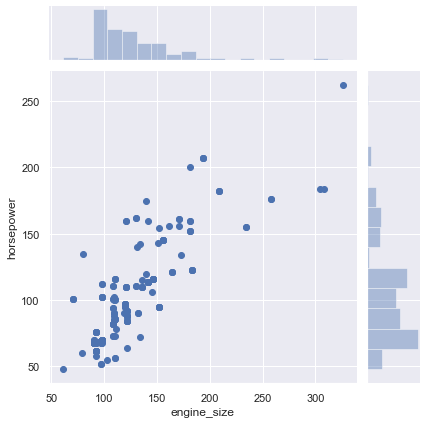

In [9]:
sns.jointplot(auto['engine_size'], auto['horsepower']);

### Hex Bin Plots :

We can make a hex bin plot the breaks the 2D area into hexagons and number of points in each hexagon determines the color

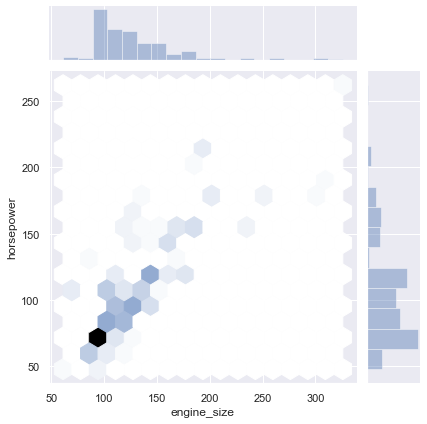

In [10]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="hex");

### Kernal density estimation :

We can make 2D estimation of density also

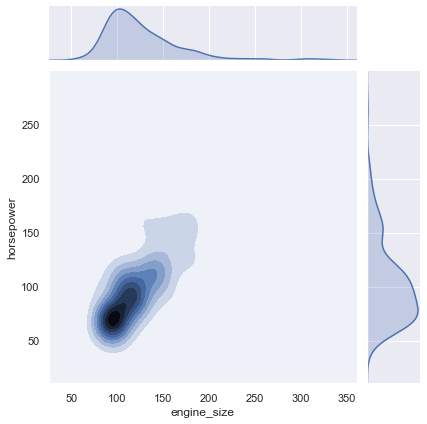

In [11]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde");

### Visualizing pairwise relationships in a dataset :

To plot multiple pairwise scatterplots in dataset you can use pairplot function. This creates matrix of axes and shows the relationship of each pair of columns in DataFrame, it also draws the histogram of each variable on diagonal Axes.

Be careful about toggle scrollingin the cell menu

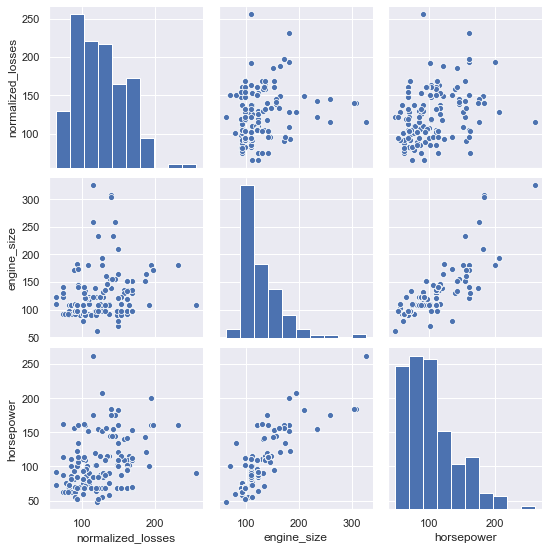

In [12]:
sns.pairplot(auto[['normalized_losses','engine_size','horsepower']]);

### 3.3 Python Visualization - How to Plot Categorically?

In strip plot the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the position(Only along the categorical axis) using 'Jitter'

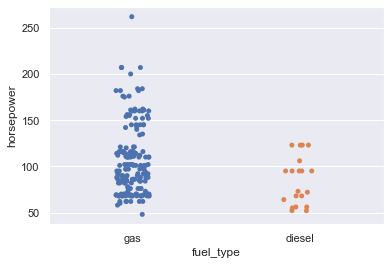

In [13]:
# stripplot

sns.stripplot(auto['fuel_type'],auto['horsepower'], jitter=True);

# Observation:if we don't define jitter property, by default jitter=True

#### A different approach would be to use the function swarmplot() which position each scatterplot points on the categorical axis and avoid overlapping point.

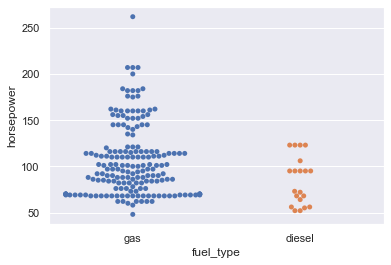

In [14]:
# swarmplot

sns.swarmplot(auto['fuel_type'],auto['horsepower']);

### Boxplots :

Another common graph is a boxplot(). This kind of graph shows the 3 quartile values of the dustribution along with extreme values. The 'Whiskers' extends to points that lie within 1.5 IQR of the lower and upper quartile, and then observations that fall outside this range are displayed independently.

In basic statics thumb rule: 
Any value < ( Q1 - 1.5 * IQR ) can be thought as an outlier
IQR => Inter quartile range (IQR = Q3-Q1)

similarly
Any value > ( Q3 + 1.5 * IQR ) can be thought as an outlier.

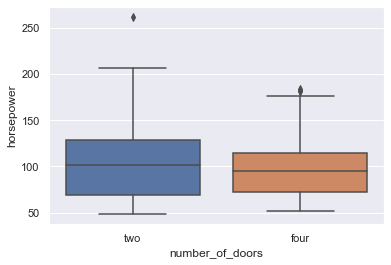

In [15]:
sns.boxplot(auto['number_of_doors'],auto['horsepower']);

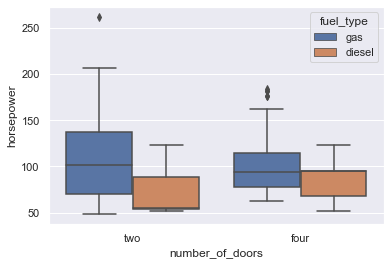

In [16]:
# hue signifies diffrent color

sns.boxplot(auto['number_of_doors'],auto['horsepower'], hue= auto['fuel_type']);

### Bar Plots :
We can plot the mean of the dataset, seperated in categories using the barplot().When there is multiple observation in each category , it uses bootstarapping to compute confidence interval around the estimate and plots that using error bars:
Bars plots starts at 0, which can sometime be practical if zero is a number you want to compare to.

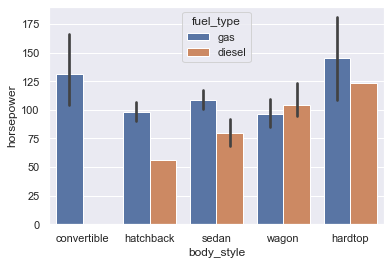

In [17]:
sns.barplot(auto['body_style'],auto['horsepower'],hue=auto['fuel_type']);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing the mean of second variable. This is similar to histogram over a categorical, rather than quantitative, variable. In seaborn it is easy to do so with countplot() function.

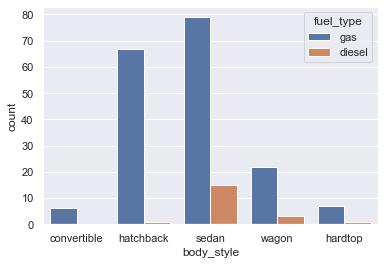

In [18]:
sns.countplot(auto['body_style'],hue=auto['fuel_type']);

### Point plots :

An alternative style for visualizing the same information is offered by pointplot() function. This function also encodes the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. additionally  pointplot connect point from  same hue category. This makes it easy to see how the main relationaship is changing as a function of second variable, because your eyes are quite good at picking up on differences of slopes  

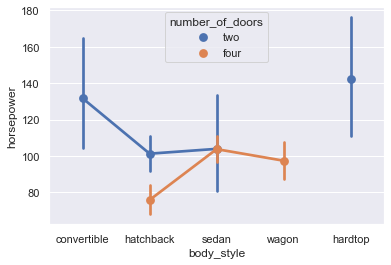

In [19]:
sns.pointplot(auto['body_style'],auto['horsepower'],hue=auto['number_of_doors']);

### Drawing Multi panel categorical plots :

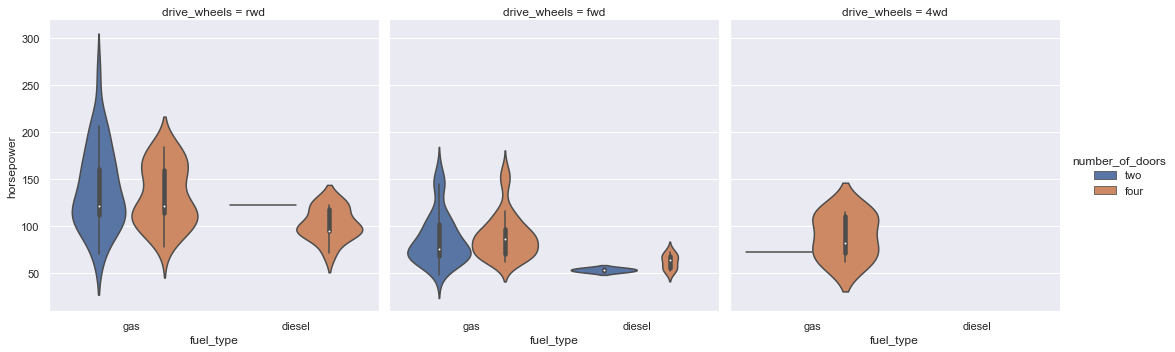

In [25]:
sns.catplot(x = 'fuel_type',
            y = 'horsepower',
            hue = 'number_of_doors',
            col = 'drive_wheels',
            data = auto,
            kind = 'violin');

Various types of kind input:{point, bar, count, box, violin, strip}

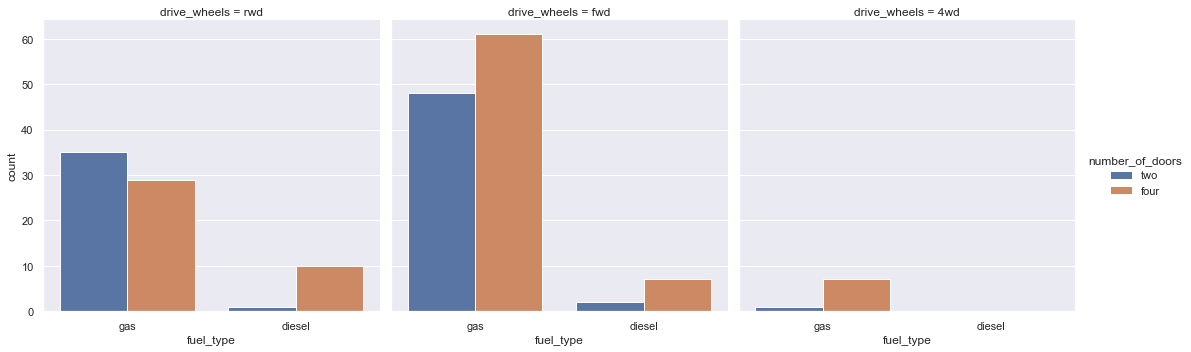

In [21]:
# for kind type : count, we should remove y axis
sns.catplot(x = 'fuel_type',
            hue = 'number_of_doors',
            col = 'drive_wheels',
            data = auto,
            kind = 'count');

### Function to dram Linear regression models :
lmplot() is the most widely used function to quickly plot the linear Relationship between 2 variables.


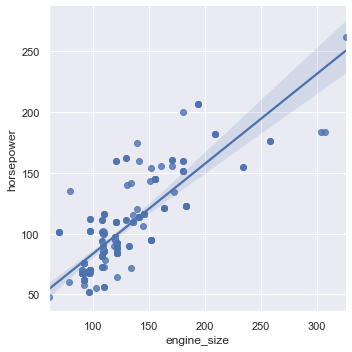

In [22]:
sns.lmplot(y='horsepower', x= 'engine_size', data=auto);

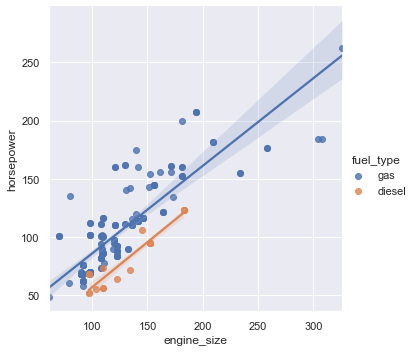

In [23]:
sns.lmplot(y='horsepower', x= 'engine_size', data=auto, hue='fuel_type');